In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install openpyxl

## Step (i): Data Visualization and Checks
The data contains information about solar electricity generation, electricity usage, and other relevant parameters. The goal of this step is to visualize and compare the average solar electricity generation and electricity usage for each hour in a day.


In [3]:
df = pd.read_excel(r"C:\Users\batru\Downloads/Junior Data Analyst _ Data (1).xlsx", skiprows=2)
df




,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000
...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600
8756,20,2020-12-31 20:00:00,0.003,4.560600
8757,21,2020-12-31 21:00:00,0.000,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [7]:
# convert the data colllumn to YYYY/MM/DD

#df['Date/hour start'] = df['Date/hour start'].astype(str)
df[['Date', 'hour']] = df['Date/hour start'].str.split(' ', expand=True)
df

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Date,hour
0,0,2020-01-01 00:00:00,0.000,1.509849,2020-01-01,00:00:00
1,1,2020-01-01 01:00:00,0.000,1.411859,2020-01-01,01:00:00
2,2,2020-01-01 02:00:00,0.000,1.023898,2020-01-01,02:00:00
3,3,2020-01-01 03:00:00,0.000,0.642000,2020-01-01,03:00:00
4,4,2020-01-01 04:00:00,0.000,0.960000,2020-01-01,04:00:00
...,...,...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600,2020-12-31,19:00:00
8756,20,2020-12-31 20:00:00,0.003,4.560600,2020-12-31,20:00:00
8757,21,2020-12-31 21:00:00,0.000,2.022000,2020-12-31,21:00:00
8758,22,2020-12-31 22:00:00,0.015,1.668000,2020-12-31,22:00:00


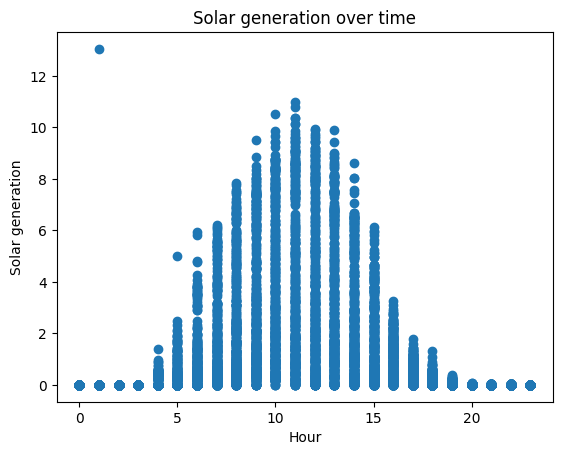

In [8]:
#Find the outlier in solar generation
plt.scatter(df['Hour'], df['Solar electricity generation (kWh)'])
plt.title('Solar generation over time')
plt.xlabel('Hour')
plt.ylabel('Solar generation')
plt.show()

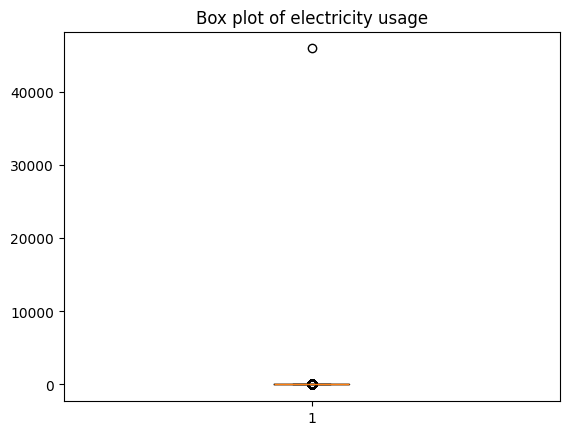

In [9]:
#find the outlier in Electrcity usage
plt.boxplot(df['Electricity usage (kWh)'])
plt.title('Box plot of electricity usage')
plt.show()

In [10]:
#get the index of the outliers in both solar and electricity generated 
outliers_index = df[(df['Solar electricity generation (kWh)'] > 12) | (df['Electricity usage (kWh)'] > 40000)].index
outliers_index


Index([276, 2569], dtype='int64')

In [11]:
#Droped the outliers in both solar and electricity generated
df.drop(index = outliers_index, inplace = True)

In [12]:
#drop unwanted collumns
df.drop(columns=["Date/hour start", "hour"], inplace=True)


In [16]:
#check if hour falls in the range of 0 to 23 
# df[(df['Hour'] < 0) | (df['Hour'] > 23)] 
#check if solar and electricity generated has negative values
# index_list = df[(df['Solar electricity generation (kWh)'] < 0) | (df['Electricity usage (kWh)'] < 0)].index

# index_list


Index([], dtype='int64')

In [15]:
#droped the the ngetaive indexes in Electricity usage from the data set
df.drop(index = index_list, inplace=True)
df


,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date
0,0,0.000,1.509849,2020-01-01
1,1,0.000,1.411859,2020-01-01
2,2,0.000,1.023898,2020-01-01
3,3,0.000,0.642000,2020-01-01
4,4,0.000,0.960000,2020-01-01
...,...,...,...,...
8755,19,0.012,4.395600,2020-12-31
8756,20,0.003,4.560600,2020-12-31
8757,21,0.000,2.022000,2020-12-31
8758,22,0.015,1.668000,2020-12-31


In [17]:
df['Date'] = df['Date'].astype(str)

In [18]:
#check for null values
df.isna().sum()

Hour                                  0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
Date                                  0
dtype: int64

In [19]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [20]:
df.describe()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
count,8753.000000,8753.000000,8753.000000
mean,11.497886,1.115337,2.065399
std,6.922001,2.022306,4.639708
min,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.300000
50%,11.000000,0.024000,0.621000
75%,17.000000,1.272000,1.686000
max,23.000000,10.998000,61.102800


In [17]:
df[df['Electricity usage (kWh)'] > 40]

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date
1194,18,0.015,40.4712,2020-02-19
1579,19,0.012,59.6046,2020-03-07
1603,19,0.006,57.0702,2020-03-08
2202,18,0.084,57.4398,2020-04-02
5562,18,0.225,54.8856,2020-08-20
5659,19,0.042,49.0116,2020-08-24
6740,20,0.000,56.7798,2020-10-08
8011,19,0.000,58.7400,2020-11-30
8204,20,0.003,57.4530,2020-12-08
8276,20,0.009,57.5058,2020-12-11


In [18]:
df[df['Electricity usage (kWh)'] == 0]

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date
10,10,0.000,0.0,2020-01-01
11,11,0.000,0.0,2020-01-01
707,11,0.000,0.0,2020-01-30
1115,11,6.078,0.0,2020-02-16
1259,11,6.999,0.0,2020-02-22
...,...,...,...,...
8717,5,0.000,0.0,2020-12-30
8718,6,0.000,0.0,2020-12-30
8719,7,0.000,0.0,2020-12-30
8720,8,0.000,0.0,2020-12-30


In [21]:
#average solar and electrcity generated over time grouped by hour
avg_solar = df.groupby('Hour')['Solar electricity generation (kWh)'].mean()
avg_electricity = df.groupby('Hour')['Electricity usage (kWh)'].mean()


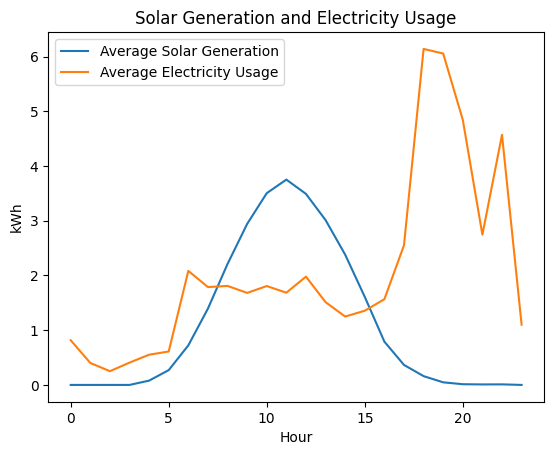

In [22]:
#visualize the average solar generation and electricity usage over time
plt.plot(avg_solar, label='Average Solar Generation')  # Plot avg_solar vs. Hour
plt.plot(avg_electricity, label='Average Electricity Usage')  # Plot avg_electricity vs. Hour

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('kWh')
plt.title('Solar Generation and Electricity Usage')

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()

## Calculate Electricity Bought
In this step, the project calculates the electricity needed to be bought from the provider by subtracting the solar electricity generation from the electricity usage. The numpy library is used to efficiently perform element-wise subtraction and limit the result to non-negative values.

In [23]:
electricity_bought = np.maximum(df['Electricity usage (kWh)'] - df['Solar electricity generation (kWh)'], 0)
df['electricity_bought'] = electricity_bought
df[df['electricity_bought'] < 0]
df

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date,electricity_bought
0,0,0.000,1.509849,2020-01-01,1.509849
1,1,0.000,1.411859,2020-01-01,1.411859
2,2,0.000,1.023898,2020-01-01,1.023898
3,3,0.000,0.642000,2020-01-01,0.642000
4,4,0.000,0.960000,2020-01-01,0.960000
...,...,...,...,...,...
8755,19,0.012,4.395600,2020-12-31,4.383600
8756,20,0.003,4.560600,2020-12-31,4.557600
8757,21,0.000,2.022000,2020-12-31,2.022000
8758,22,0.015,1.668000,2020-12-31,1.653000


## Calculating Excess Solar Generation
The excess solar electricity generated is calculated by subtracting the electricity usage from the solar electricity generation. Similar to Step (ii), numpy is used to perform element-wise subtraction and limit the result to non-negative values.


In [24]:
df['excess_solar'] = np.maximum(df['Solar electricity generation (kWh)'] - df['Electricity usage (kWh)'], 0)
df

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),Date,electricity_bought,excess_solar
0,0,0.000,1.509849,2020-01-01,1.509849,0.0
1,1,0.000,1.411859,2020-01-01,1.411859,0.0
2,2,0.000,1.023898,2020-01-01,1.023898,0.0
3,3,0.000,0.642000,2020-01-01,0.642000,0.0
4,4,0.000,0.960000,2020-01-01,0.960000,0.0
...,...,...,...,...,...,...
8755,19,0.012,4.395600,2020-12-31,4.383600,0.0
8756,20,0.003,4.560600,2020-12-31,4.557600,0.0
8757,21,0.000,2.022000,2020-12-31,2.022000,0.0
8758,22,0.015,1.668000,2020-12-31,1.653000,0.0


In [25]:
#rearange the collumns
df = df[['Hour', 'Date', 'Solar electricity generation (kWh)', 'Electricity usage (kWh)','electricity_bought', 'excess_solar']]
df

,Hour,Date,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought,excess_solar
0,0,2020-01-01,0.000,1.509849,1.509849,0.0
1,1,2020-01-01,0.000,1.411859,1.411859,0.0
2,2,2020-01-01,0.000,1.023898,1.023898,0.0
3,3,2020-01-01,0.000,0.642000,0.642000,0.0
4,4,2020-01-01,0.000,0.960000,0.960000,0.0
...,...,...,...,...,...,...
8755,19,2020-12-31,0.012,4.395600,4.383600,0.0
8756,20,2020-12-31,0.003,4.560600,4.557600,0.0
8757,21,2020-12-31,0.000,2.022000,2.022000,0.0
8758,22,2020-12-31,0.015,1.668000,1.653000,0.0


## Modeling Battery Charge Level

This step models the cumulative battery charge level over time. The project assumes a maximum battery capacity of 12.5 kWh. The battery charge level is updated iteratively using a loop that considers the excess solar electricity generated and limits the charging to the battery's maximum capacity.


In [26]:
# steps
# 1. get elecricity bought
# 2  electrcity bought - battery level = electrcity_bought_battery
# 3  reduce battery level by electrcity_bought_battery
# 4  append battery level to its battery_levels list
# 5  append electrcity_bought_battery to its list
# 6  return the two lists

#Modeling Battery Charge Level
def battery_model (excess_solar, electrcity_bought):
    battery_level = 0
    battery_levels = []
    max_capacity = 12.5
    electrcity_bought_battery_list = []
    
    #convert electrcity_bought to a list
#     list_elec = list(electrcity_bought)
    
    #loops through excess solar and electrcity_bought collumn and sets the battery level for each
    for solar, elec in zip(excess_solar, electrcity_bought):
        if solar > 0 :
            electrcity_bought_battery = 0 #set the electricty_bought_battery to zero since we dont need electrcity
            if battery_level < max_capacity:
                battery_level += solar #increment the battery level
                if battery_level >= max_capacity:
                    battery_level = max_capacity #set the battery level to max capacity
              
            
        else: #If no solar set drain the battery level and set electicity bought battery to the one from the grid
            battery_level = battery_level - elec
            if battery_level <= 0:
                battery_level = 0
                
                electrcity_bought_battery = elec
        
        
        #append the battery level to the battery_levels list and electcricity bought with battery
        battery_levels.append(battery_level)
        electrcity_bought_battery_list.append(electrcity_bought_battery)
    
#         electrcity_bought_battery = np.array(list_elec) - np.array(battery_levels)
        
    return battery_levels, electrcity_bought_battery_list
df['battery_level'], df['electrcity_bought_battery'] = battery_model(df['excess_solar'], df['electricity_bought'])

C:\Users\batru\AppData\Local\Temp\ipykernel_11152\1357715004.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['battery_level'], df['electrcity_bought_battery'] = battery_model(df['excess_solar'], df['electricity_bought'])
C:\Users\batru\AppData\Local\Temp\ipykernel_11152\1357715004.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['battery_level'], df['electrcity_bought_battery'] = battery_model(df['excess_solar'], df['electricity_bought'])


In [27]:
df[df['excess_solar'] >0]

,Hour,Date,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought,excess_solar,battery_level,electrcity_bought_battery
9,9,2020-01-01,0.846,0.606,0.0,0.240,0.240,0.0
12,12,2020-01-01,0.651,0.396,0.0,0.255,0.495,0.0
58,10,2020-01-03,1.086,0.897,0.0,0.189,0.189,0.0
59,11,2020-01-03,0.993,0.726,0.0,0.267,0.456,0.0
60,12,2020-01-03,2.031,0.360,0.0,1.671,2.127,0.0
...,...,...,...,...,...,...,...,...
8723,11,2020-12-30,1.383,1.260,0.0,0.123,0.123,0.0
8724,12,2020-12-30,3.957,1.308,0.0,2.649,2.772,0.0
8725,13,2020-12-30,1.641,1.512,0.0,0.129,2.901,0.0
8749,13,2020-12-31,2.535,0.471,0.0,2.064,2.064,0.0


In [28]:
df.describe()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought,excess_solar,battery_level,electrcity_bought_battery
count,8753.000000,8753.000000,8753.000000,8753.000000,8753.000000,8753.000000,8753.000000
mean,11.497886,1.115337,2.065399,1.785131,0.835069,3.199417,1.548206
std,6.922001,2.022306,4.639708,4.533608,1.882896,4.679108,4.525232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.024000,0.621000,0.345000,0.000000,0.000000,0.171983
75%,17.000000,1.272000,1.686000,1.488000,0.435000,5.919882,1.039896
max,23.000000,10.998000,61.102800,61.096800,10.998000,12.500000,61.096800


In [95]:
df.describe()


,Hour,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought,excess_solar,battery_level,electrcity_bought_battery
count,8753.000000,8753.000000,8753.000000,8753.000000,8753.000000,8753.000000,8753.000000
mean,11.497886,1.115337,2.065399,1.785131,0.835069,3.199417,1.548206
std,6.922001,2.022306,4.639708,4.533608,1.882896,4.679108,4.525232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.024000,0.621000,0.345000,0.000000,0.000000,0.171983
75%,17.000000,1.272000,1.686000,1.488000,0.435000,5.919882,1.039896
max,23.000000,10.998000,61.102800,61.096800,10.998000,12.500000,61.096800


## Step (vi): Calculating Savings from Installing a Battery
To quantify the potential savings from installing a battery, the project calculates the cost difference between buying electricity from the provider without a battery and buying electricity with a battery. The electricity price is assumed to be $0.17 per kWh.


In [29]:
df['saved_cost'] = (df['electricity_bought'] - df['electrcity_bought_battery'] )* 0.17
amount_saved = df['saved_cost'].sum()
print(amount_saved)

352.546793288


C:\Users\batru\AppData\Local\Temp\ipykernel_11152\1795468326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['saved_cost'] = (df['electricity_bought'] - df['electrcity_bought_battery'] )* 0.17


In [30]:
df.describe()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought,excess_solar,battery_level,electrcity_bought_battery,saved_cost
count,8753.000000,8753.000000,8753.000000,8753.000000,8753.000000,8753.000000,8753.000000,8753.000000
mean,11.497886,1.115337,2.065399,1.785131,0.835069,3.199417,1.548206,0.040277
std,6.922001,2.022306,4.639708,4.533608,1.882896,4.679108,4.525232,0.152960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.024000,0.621000,0.345000,0.000000,0.000000,0.171983,0.000000
75%,17.000000,1.272000,1.686000,1.488000,0.435000,5.919882,1.039896,0.000000
max,23.000000,10.998000,61.102800,61.096800,10.998000,12.500000,61.096800,2.091000


## Step (vii): Data Aggregation and Visualization
The project aggregates the data on a monthly basis to provide a broader perspective. The aggregated values include total solar generation, electricity usage, electricity bought without a battery, and electricity bought with a battery. This aggregated data is then visualized using a bar plot, with each month represented on the x-axis and the respective values on the y-axis.


In [31]:
#convert the date collumn to datetime
df['Date'] = pd.to_datetime(df['Date'])
#extract the month 
df['Month'] = df['Date'].dt.month_name()
df

C:\Users\batru\AppData\Local\Temp\ipykernel_11152\2940634921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\batru\AppData\Local\Temp\ipykernel_11152\2940634921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month_name()


,Hour,Date,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought,excess_solar,battery_level,electrcity_bought_battery,saved_cost,Month
0,0,2020-01-01,0.000,1.509849,1.509849,0.0,0.0,1.509849,0.0,January
1,1,2020-01-01,0.000,1.411859,1.411859,0.0,0.0,1.411859,0.0,January
2,2,2020-01-01,0.000,1.023898,1.023898,0.0,0.0,1.023898,0.0,January
3,3,2020-01-01,0.000,0.642000,0.642000,0.0,0.0,0.642000,0.0,January
4,4,2020-01-01,0.000,0.960000,0.960000,0.0,0.0,0.960000,0.0,January
...,...,...,...,...,...,...,...,...,...,...
8755,19,2020-12-31,0.012,4.395600,4.383600,0.0,0.0,4.383600,0.0,December
8756,20,2020-12-31,0.003,4.560600,4.557600,0.0,0.0,4.557600,0.0,December
8757,21,2020-12-31,0.000,2.022000,2.022000,0.0,0.0,2.022000,0.0,December
8758,22,2020-12-31,0.015,1.668000,1.653000,0.0,0.0,1.653000,0.0,December


In [33]:
#agregate the data monthly

# Mapping of month names to numeric values
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Group by 'Month' and sum the relevant columns
aggregated_df = df.groupby('Month')[['Solar electricity generation (kWh)', 'Electricity usage (kWh)', 'electricity_bought', 'electrcity_bought_battery']].sum()

# Sort by the 'Month' index based on the month order mapping
aggregated_df = aggregated_df.reindex(sorted(aggregated_df.index, key=lambda x: month_order[x]))

# Display the aggregated and sorted DataFrame
aggregated_df



,Solar electricity generation (kWh),Electricity usage (kWh),electricity_bought,electrcity_bought_battery
Month,,,,
January,261.039,1717.804181,1599.601181,1529.767781
February,449.628,1559.929310,1392.808310,1294.030310
March,602.451,1797.859450,1619.011450,1503.108773
April,902.082,1726.040519,1460.504519,1287.239524
May,1640.175,946.317809,717.333809,446.248639
June,1408.287,1158.995538,844.784538,576.016996
July,1371.465,1196.957121,907.445121,618.832589
August,1158.639,1491.525351,1217.886351,992.178222
September,834.963,1622.691165,1398.834165,1187.440048


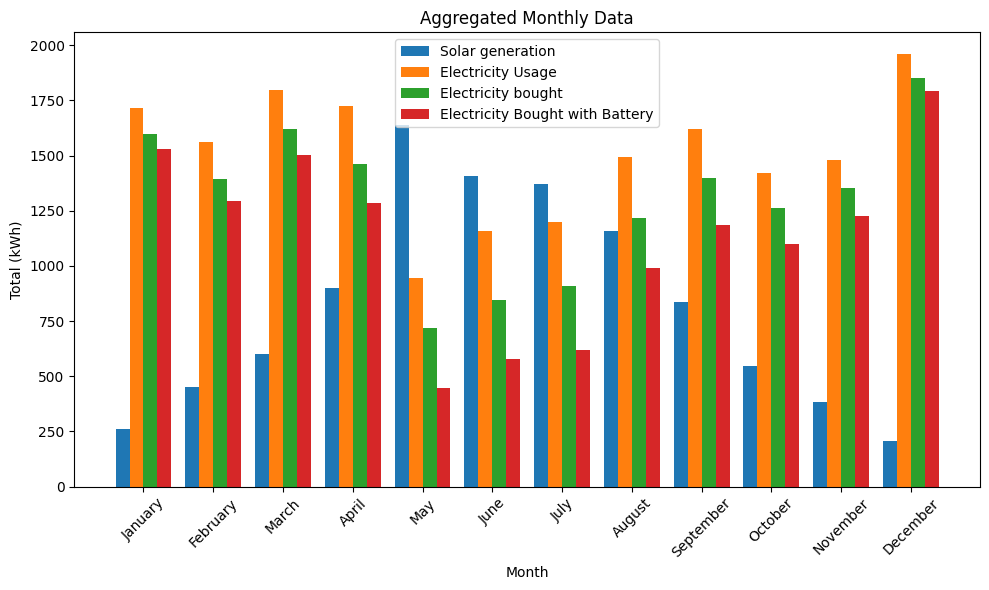

In [35]:

# Number of categories (bars per month)
n_categories = 4

# Width of each bar
bar_width = 0.2

# Positions of the bars for each group (adjust for the number of categories)
index = np.arange(len(aggregated_df))

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot each category as a separate bar, offset by bar_width
plt.bar(index - 1.5 * bar_width, aggregated_df['Solar electricity generation (kWh)'], width=bar_width, label='Solar generation')
plt.bar(index - 0.5 * bar_width, aggregated_df['Electricity usage (kWh)'], width=bar_width, label='Electricity Usage')
plt.bar(index + 0.5 * bar_width, aggregated_df['electricity_bought'], width=bar_width, label='Electricity bought')
plt.bar(index + 1.5 * bar_width, aggregated_df['electrcity_bought_battery'], width=bar_width, label='Electricity Bought with Battery')

# Labeling the axes and the title
plt.xlabel("Month")
plt.ylabel("Total (kWh)")
plt.title('Aggregated Monthly Data')

# Set the x-ticks to the month names
plt.xticks(index, aggregated_df.index, rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


## Conclusion
This project demonstrates the process of analyzing solar electricity generation, electricity usage, and battery usage data. It showcases various data manipulation techniques, calculations, and data visualization methods using Python and its libraries. The results provide insights into the potential benefits of utilizing a battery system to store excess solar electricity, leading to potential cost savings and increased energy efficiency